# Python for deep learning

In [19]:
import os
if  not os.path.isdir('./training'):
  !cd /content/ && git clone https://github.com/MontpellierRessourcesImagerie/DL_EXP_PC.git && cp -r DL_EXP_PC/data . && cp -r DL_EXP_PC/training .
  %cd DL_EXP_PCµ

## Cell 15

```python
import os
imageNames = sorted([name for name in os.listdir('./data') if not os.path.isdir(os.path.join("./data", name))])
inputImages = [tiff.imread(os.path.join("./data", name)) for name in imageNames]
gtImages = [tiff.imread(os.path.join("./data/gt", name)) for name in imageNames]
masks = [tiff.imread(os.path.join("./data/out", name.replace('.tif', '-mask.tif'))) for name in imageNames]
pMaps = [tiff.imread(os.path.join("./data/out", name.replace('.tif', '-pMap.tif'))) for name in imageNames]   
for line in range(0, len(imageNames)):
    plt.figure(figsize = (18*2,19*2))
    for i, pltImage, title in zip(range(1, 5), [inputImages[line], pMaps[line], masks[line], gtImages[line]], [imageNames[line], 'pMap', 'mask', 'gt']):
        ax = plt.subplot(len(imageNames), 4, 4*line + i)
        ax.title.set_text(title)
        plt.axis('off')
        plt.imshow(pltImage)
```

In cell 15 we display the result probabilities and masks for all the input images, together with the input and the ground-truth image.

We first get a sorted list of the names of the images in the input folder.

In [3]:
import os
imageNames = sorted([name for name in os.listdir('./data') if not os.path.isdir(os.path.join("./data", name))])
imageNames

['spots01.tif', 'spots02.tif']

We load the input images.

In [9]:
import tifffile as tiff
print([os.path.join("./data", name) for name in imageNames])
inputImages = [tiff.imread(os.path.join("./data", name)) for name in imageNames]
[image.shape for image in inputImages]

['./data/spots01.tif', './data/spots02.tif']


[(1830, 1980), (1830, 1980)]

We load the ground-truth images in the same way as the input images.

In [11]:
print([os.path.join("./data/gt", name) for name in imageNames])
gtImages = [tiff.imread(os.path.join("./data/gt", name)) for name in imageNames]
[image.shape for image in gtImages]

['./data/gt/spots01.tif', './data/gt/spots02.tif']


[(1830, 1980), (1830, 1980)]

Now we load the pMaps and masks. To get the right filenames we replace the '.tif' by '-mask.tif' and '-pMap.tif'.

In [17]:
print([os.path.join("./data/out", name.replace('.tif', '-mask.tif')) for name in imageNames])
print([os.path.join("./data/out", name.replace('.tif', '-pMap.tif')) for name in imageNames])
masks = [tiff.imread(os.path.join("./data/out", name.replace('.tif', '-mask.tif'))) for name in imageNames]
pMaps = [tiff.imread(os.path.join("./data/out", name.replace('.tif', '-pMap.tif'))) for name in imageNames] 
print([image.shape for image in masks])
print([image.shape for image in pMaps])

['./data/out/spots01-mask.tif', './data/out/spots02-mask.tif']
['./data/out/spots01-pMap.tif', './data/out/spots02-pMap.tif']
[(1830, 1980), (1830, 1980)]
[(1830, 1980), (1830, 1980)]


Now we use the module pyplot from matplotlib to display the images in a table, that we create using subplots. The numpy-arrays can be displayed with the function ``imshow`` from pyplot.

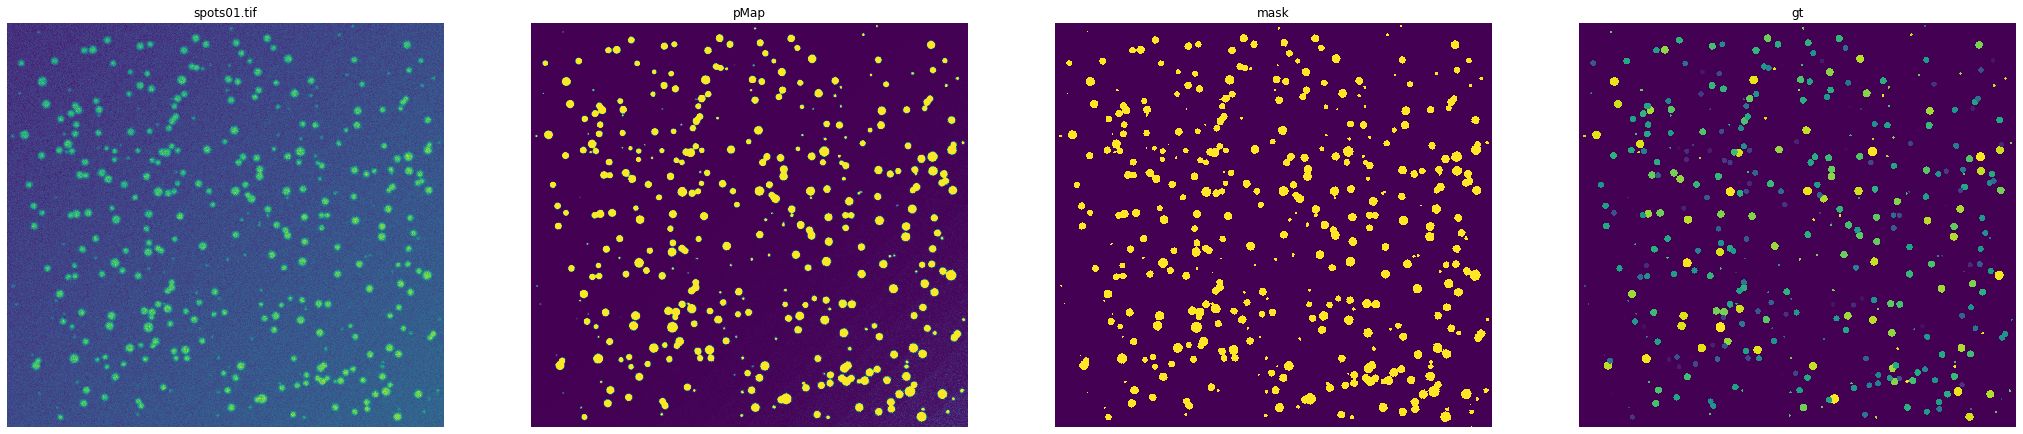

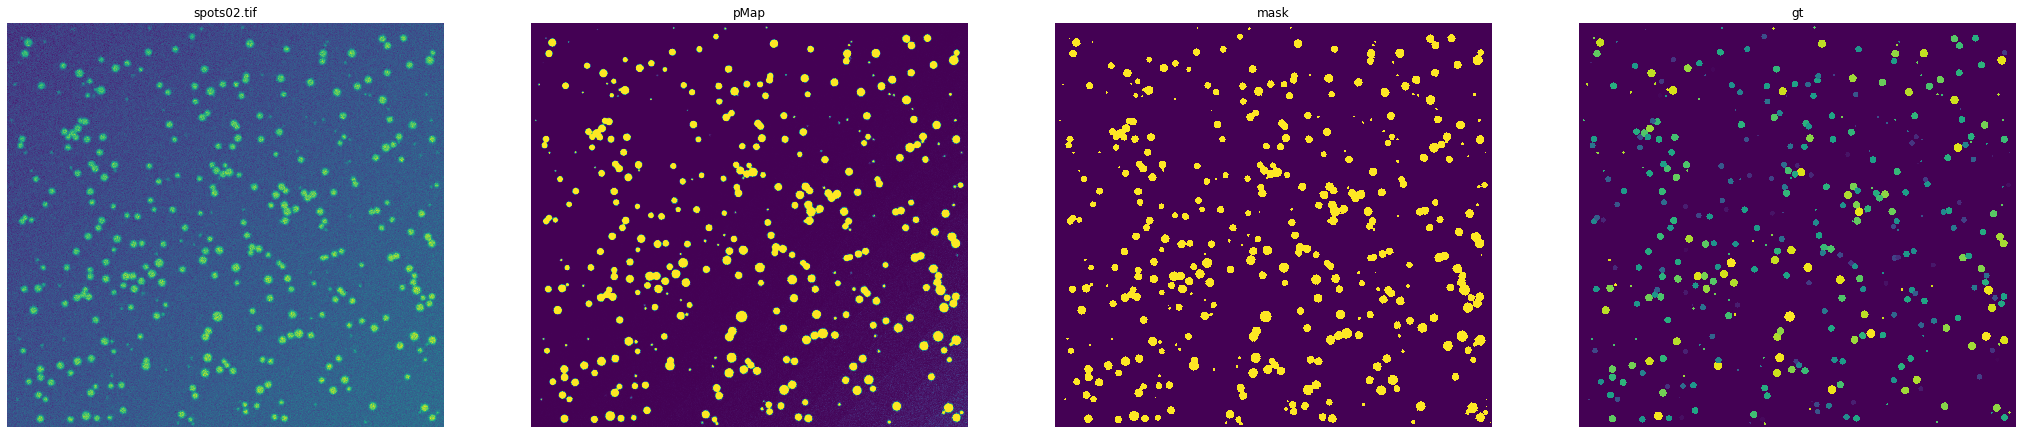

In [18]:
from matplotlib import pyplot as plt
for line in range(0, len(imageNames)):
    plt.figure(figsize = (18*2,19*2))
    for i, pltImage, title in zip(range(1, 5), [inputImages[line], pMaps[line], masks[line], gtImages[line]], [imageNames[line], 'pMap', 'mask', 'gt']):
        ax = plt.subplot(len(imageNames), 4, 4*line + i)
        ax.title.set_text(title)
        plt.axis('off')
        plt.imshow(pltImage)

Note, that you can double-click on a line in the plot to see it in its full size. You can then scroll to see all images. A new double-click will reset the size again.